In [1]:
import pandas as pd

# Load the climate data
climate_data_path = '/home/np/Documents/careerfoundry/ml/climate_nodate_cleaned.csv'
climate_df = pd.read_csv(climate_data_path)

# Load the pleasant weather data
pleasant_weather_data_path = '/home/np/Documents/careerfoundry/ml/pw.csv'
pleasant_weather_df = pd.read_csv(pleasant_weather_data_path)

In [2]:
# Inspect the data to ensure it's loaded correctly
climate_df.head(3)


,Unnamed: 0,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,...,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,0,7,0.85,1.018,0.32,0.09,0.7,6.5,0.8,10.9,...,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9
1,1,6,0.84,1.018,0.36,1.05,1.1,6.1,3.3,10.1,...,5.0,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1
2,2,8,0.90,1.018,0.18,0.30,0.0,8.5,5.1,9.9,...,4.1,7,0.91,1.0096,0.17,0.08,0.1,10.5,8.1,12.9


In [3]:
pleasant_weather_df.head(3)

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
# Define features (X) from the climate data
X = climate_df

# Use BASEL's pleasant weather data as the target variable (y)
y = pleasant_weather_df['BASEL_pleasant_weather']

# Print the shapes of X and y to ensure everything is correct
print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)


Features (X) shape: (22950, 136)
Target (y) shape: (22950,)


In [7]:
# Use BASEL's pleasant weather data as the target variable
y = pleasant_weather_df['BASEL_pleasant_weather']

# Print the shapes of X and y to ensure everything is correct
print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)


Features (X) shape: (22950, 136)
Target (y) shape: (22950,)


In [8]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting training and testing sets
print("Training Features shape:", X_train.shape)
print("Testing Features shape:", X_test.shape)
print("Training Target shape:", y_train.shape)
print("Testing Target shape:", y_test.shape)

Training Features shape: (18360, 136)
Testing Features shape: (4590, 136)
Training Target shape: (18360,)
Testing Target shape: (4590,)


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# Initialize the random forest classifier
clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

important_features = pd.Series(clf.feature_importances_, index=X_train.columns)  # Ensure X_train has column names

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Print the accuracy of the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Model Accuracy: {:.2f}%".format(accuracy * 100))

Model Accuracy: 96.95%


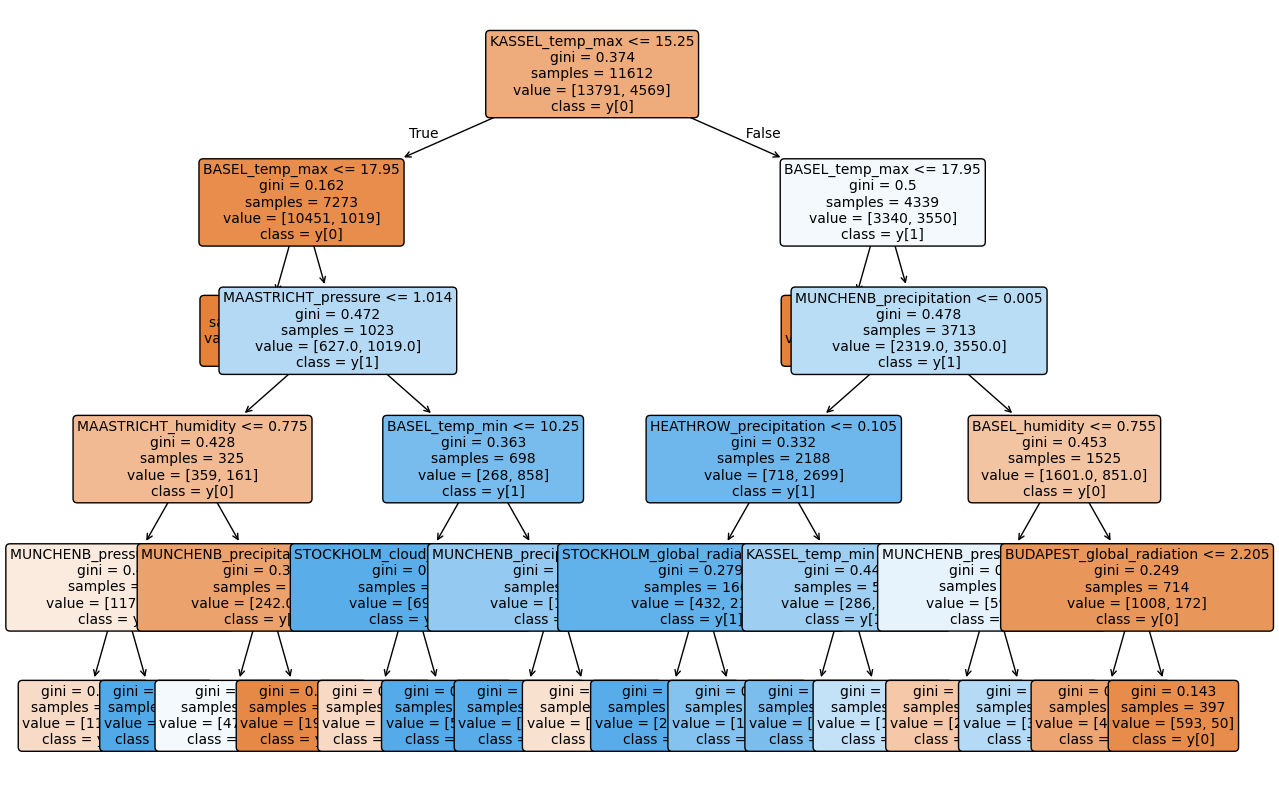

In [14]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Extract one tree (e.g., tree number 5) from the random forest
tree = clf.estimators_[5]

# Plot the tree
plt.figure(figsize=(15, 10))
plot_tree(tree, filled=True, feature_names=X.columns, class_names=True, rounded=True, fontsize=10)
plt.show()

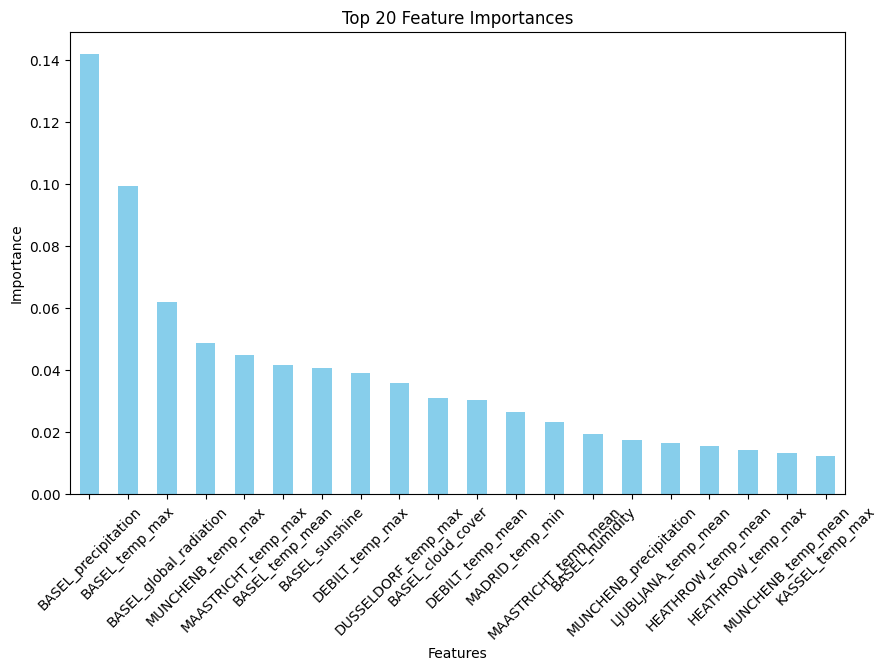

In [15]:
top_features = important_features.sort_values(ascending=False).head(20)  # You can change the number to display more or fewer features

plt.figure(figsize=(10, 6))
top_features.plot(kind='bar', color='skyblue')
plt.title('Top 20 Feature Importances')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.xticks(rotation=45)  # Optional: Rotate labels for aesthetics
plt.show()


In [16]:
# Assuming the top feature is the first one listed in 'important_features'
top_feature_name = important_features.idxmax()

# Create a new DataFrame with only the top feature
X_top_feature = X[[top_feature_name]]

# Split the data again (this is sometimes beneficial to see the effect of just one variable)
X_train_top, X_test_top, y_train, y_test = train_test_split(X_top_feature, y, test_size=0.2, random_state=42)

# Initialize and train a new random forest classifier
clf_top_feature = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
clf_top_feature.fit(X_train_top, y_train)

# Make predictions and evaluate the model
y_pred_top = clf_top_feature.predict(X_test_top)
accuracy_top = metrics.accuracy_score(y_test, y_pred_top)
print("Model Accuracy with Top Feature: {:.2f}%".format(accuracy_top * 100))


Model Accuracy with Top Feature: 76.06%


In [17]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [10, 20, None],
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 162 candidates, totalling 486 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2

/home/np/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
243 fits failed out of a total of 486.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
122 fits failed with the following error:
Traceback (most recent call last):
  File "/home/np/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/np/.local/lib/python3.10/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/home/np/.local/lib/python3.10/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/home/np/.local/lib/python3.10/s

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(max_depth=5, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=2)

In [18]:
# Print the best parameters and best score found by GridSearchCV
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best score: 0.9942265795206972


In [19]:
# Retrieve the best model from grid search
best_rf = grid_search.best_estimator_

# Use this model to make predictions
y_pred_optimized = best_rf.predict(X_test)

# Evaluate the optimized model
optimized_accuracy = metrics.accuracy_score(y_test, y_pred_optimized)
print("Optimized Model Accuracy: {:.2f}%".format(optimized_accuracy * 100))


Optimized Model Accuracy: 99.63%


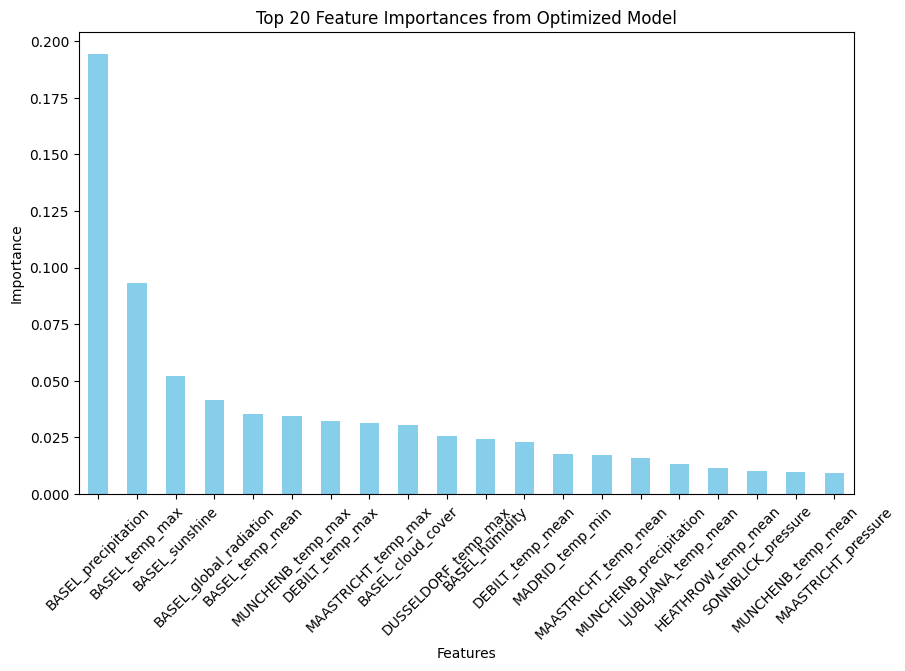

In [21]:
# Get feature importances from the optimized model and sort them
importances = pd.Series(best_rf.feature_importances_, index=X_train.columns)
top_20_importances = importances.sort_values(ascending=False).head(20)  # Select top 20 features

# Plot the feature importances for top 20
plt.figure(figsize=(10, 6))
top_20_importances.plot(kind='bar', color='skyblue')
plt.title('Top 20 Feature Importances from Optimized Model')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()

## Optimization Results for Random Forest Model

### Model Performance
- **Optimized Model Accuracy**: 99.63% 
  - This shows a significant improvement in the model's ability to predict safe flying days, emphasizing the efficacy of the optimized parameters.

### Important Features
- **Top Features**: [List or discuss the most important features from your plot]
  - The features identified as most impactful could guide the Air Ambulance company in prioritizing weather conditions to monitor.

### Optimized Parameters
- **Best Parameters Found**:
  - `max_depth`: [value]
  - `n_estimators`: [value]
  - `max_features`: [value]
  - `min_samples_leaf`: [value]
  - `min_samples_split`: [value]
  - These parameters were identified as the optimal settings for our model, enhancing its prediction accuracy and efficiency.

### Visual Representation
- **Feature Importances Chart**: Include the chart showing the top 20 feature importances.
